In [1]:
from tqdm.notebook import tqdm_notebook as tqdm
import sys
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

#curr_directory = os.getcwd()
#curr_directory = os.path.dirname( os.path.abspath(__file__) )
#sys.path.append( os.path.dirname(  os.path.dirname( curr_directory ) ) )
#import util.experiments


In [2]:
RESULTS_DIR = "results/"

files = ['ag2_beta_update.py-SET27-step1.npy',
'experiments/agent_2/results/ag2_beta_update.py-SET27-step2.npy',
'experiments/agent_2/results/ag2_beta_update.py-SET27-step3.npy',
'experiments/agent_2/results/ag2_beta_update.py-SET27-step4.npy',
'experiments/agent_2/results/ag2_beta_update.py-SET27-step8.npy',
'experiments/agent_2/results/ag2_beta_update.py-SET27-step16.npy',
'experiments/agent_2/results/ag2_beta_update.pynew-step2.npy',
'experiments/agent_2/results/ag2_beta.py.npy',
'experiments/agent_2/results/ag2_features.py.npy',
'experiments/agent_2/results/ag2_lr.py.npy',
'experiments/agent_2/results/ag2_nstep.py.npy'
]


In [3]:
dfs = []
for f in files:
    experiment_data = np.load(RESULTS_DIR + f, allow_pickle=True).item()
    break
    #df = convert_to_df(f)
    #dfs.append(df)

In [4]:
experiment_data

{'main_param': 'beta_update',
 'main_param_tested_values': [21, 22, 23, 37, 38, 41, 42, 43, 44],
 'env_parameters': {'graph': 'map_a.adj',
  'num_agents': 10,
  'reward_type': 'delta_avg_idleness'},
 'exp_parameters': {'num_runs': 100, 'num_steps': 350, 'rand_seed': 1703},
 'agent_parameters': {'features': 'pi',
  'learning_rate': 0.09,
  'beta': 0.623,
  'n_step': 1},
 'rewards': array([[[-0.82, -0.7 , -0.64, ..., -0.22, -0.04,  0.3 ],
         [-0.82, -0.76, -0.62, ..., -0.04, -0.06,  0.26],
         [-0.82, -0.72, -0.62, ..., -0.34, -0.02,  0.12],
         ...,
         [-0.8 , -0.72, -0.68, ..., -0.2 , -0.12, -0.08],
         [-0.82, -0.74, -0.6 , ...,  0.14,  0.26, -0.08],
         [-0.8 , -0.7 , -0.66, ...,  0.34, -0.16, -0.08]],
 
        [[-0.82, -0.7 , -0.64, ..., -0.22, -0.04,  0.3 ],
         [-0.82, -0.76, -0.62, ..., -0.04, -0.06,  0.26],
         [-0.82, -0.72, -0.62, ..., -0.34, -0.02,  0.12],
         ...,
         [-0.8 , -0.72, -0.68, ..., -0.2 , -0.12, -0.08],
      

In [5]:
rewards_per_step = experiment_data['rewards']
rewards_per_step.shape

(9, 100, 350)

In [6]:
cumulative_r_per_step = experiment_data['cumulative_rewards']
cumulative_r_per_step.shape

(9, 100, 350)

In [7]:
agent_params = ['features', 'learning_rate', 'beta', 'beta_update', 'n_step']
all_cols = list(agent_params)
all_cols.extend(['run', 'step', 'step_reward', 'cumulative_reward'])
bigdf = pd.DataFrame(columns=all_cols)

main_param = experiment_data['main_param']
main_param_values = experiment_data['main_param_tested_values']

shape = experiment_data['rewards'].shape
episteps = shape[2]

for param_i in tqdm(range(shape[0])):
    for run_i in range(shape[1]):
        df_data = {'step': range(1,episteps+1), 'step_reward': rewards_per_step[param_i,run_i] , 'cumulative_reward':  cumulative_r_per_step[param_i,run_i]}
        df = pd.DataFrame(df_data)
        df[main_param] = main_param_values[param_i]
        df['run'] = run_i + 1
        # stack the DataFrames on top of each other
        bigdf = pd.concat([bigdf, df], axis=0)

for param in agent_params:
  if param != main_param:
    bigdf[param] = experiment_data['agent_parameters'][param]

bigdf

100%|██████████| 9/9 [00:14<00:00,  1.61s/it]


,features,learning_rate,beta,beta_update,n_step,run,step,step_reward,cumulative_reward
0,pi,0.09,0.623,21,1,1,1,-0.82,-0.82
1,pi,0.09,0.623,21,1,1,2,-0.7,-1.52
2,pi,0.09,0.623,21,1,1,3,-0.64,-2.16
3,pi,0.09,0.623,21,1,1,4,-0.72,-2.88
4,pi,0.09,0.623,21,1,1,5,-0.44,-3.32
...,...,...,...,...,...,...,...,...,...
345,pi,0.09,0.623,44,1,100,346,0.34,-3.94
346,pi,0.09,0.623,44,1,100,347,0.38,-3.56
347,pi,0.09,0.623,44,1,100,348,0.1,-3.46
348,pi,0.09,0.623,44,1,100,349,0.16,-3.3


In [8]:
filter = (bigdf['beta_update']==21) & (bigdf['run']==1)
filter

0       True
1       True
2       True
3       True
4       True
       ...  
345    False
346    False
347    False
348    False
349    False
Length: 315000, dtype: bool

<AxesSubplot:>

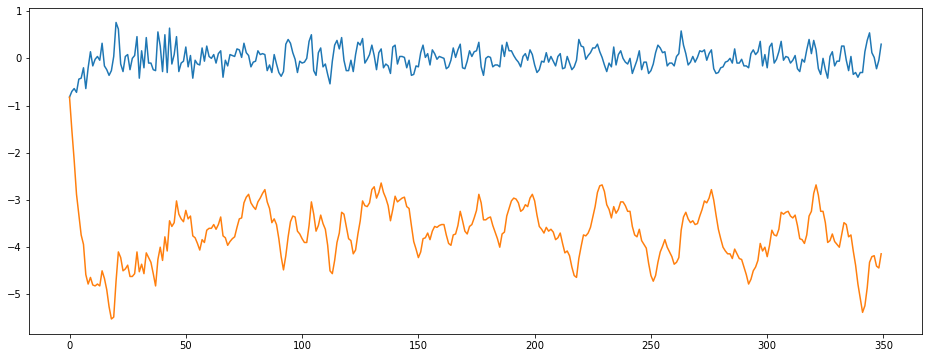

In [9]:
plt.figure(figsize=(17,7))
bigdf[filter]['step_reward'].plot()
bigdf[filter]['cumulative_reward'].plot()

<AxesSubplot:>

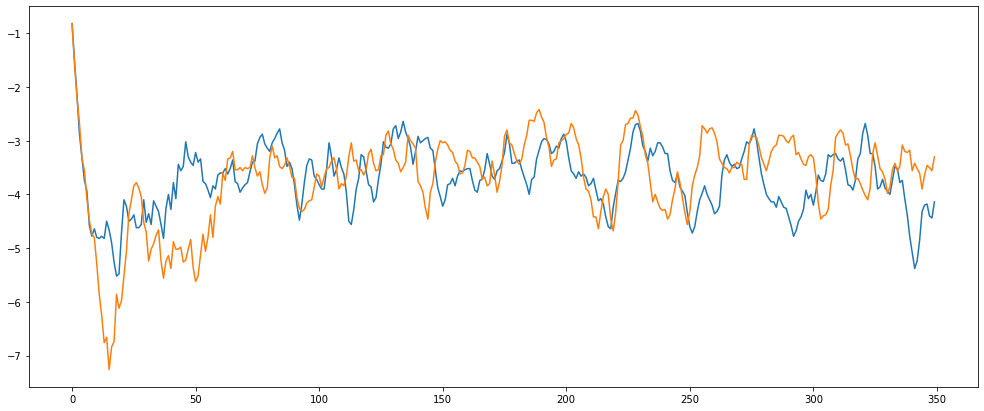

In [23]:
filter_run1 = (bigdf['beta_update']==21) & (bigdf['run']==1)
filter_run2 = (bigdf['beta_update']==21) & (bigdf['run']==2)
plt.figure(figsize=(17,7))
bigdf[filter_run1]['cumulative_reward'].plot()
bigdf[filter_run2]['cumulative_reward'].plot()

In [11]:
bigdf.groupby('beta_update')['features'].count()

beta_update
21    35000
22    35000
23    35000
37    35000
38    35000
41    35000
42    35000
43    35000
44    35000
Name: features, dtype: int64

<AxesSubplot:xlabel='step'>

<Figure size 1224x504 with 0 Axes>

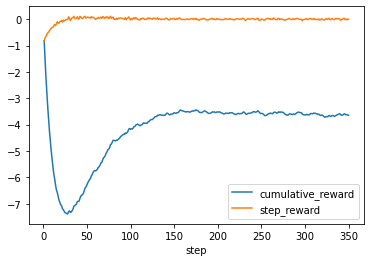

In [26]:
filter = (bigdf['beta_update']==21) 
plt.figure(figsize=(17,7))
bigdf[filter].groupby('step')[['cumulative_reward', 'step_reward']].mean().plot()

In [13]:
#bigdf[filter]['step_reward'].plot.box()
dfx = bigdf.groupby(['beta_update','step'])[['step_reward', 'cumulative_reward']].mean() 
dfx

step_reward  cumulative_reward
beta_update step                                
21          1         -0.8170            -0.8170
            2         -0.7198            -1.5368
            3         -0.6498            -2.1866
            4         -0.5842            -2.7708
            5         -0.5180            -3.2888
...                       ...                ...
44          346        0.0228            -3.5766
            347        0.0166            -3.5600
            348       -0.0172            -3.5772
            349       -0.0336            -3.6108
            350       -0.0322            -3.6430

[3150 rows x 2 columns]

In [14]:
#não deu certo
#dfy = dfx.pivot(index='step',columns='beta_update',values='step_reward')
#dfy

In [15]:
#dfx.loc[21,:]
dfx.loc[21].loc[101:]

,step_reward,cumulative_reward
step,,
101,0.0220,-4.1558
102,-0.0124,-4.1682
103,0.0354,-4.1328
104,0.0544,-4.0784
105,0.0078,-4.0706
...,...,...
346,-0.0138,-3.6020
347,-0.0252,-3.6272
348,0.0066,-3.6206


In [16]:
dfz = pd.DataFrame()
for bu_val in bigdf['beta_update'].unique():
    dfz['beta_update='+str(bu_val)] = dfx.loc[bu_val].loc[151:]['step_reward']
dfz


,beta_update=21,beta_update=22,beta_update=23,beta_update=37,beta_update=38,beta_update=41,beta_update=42,beta_update=43,beta_update=44
step,,,,,,,,,
151,-0.0134,-0.0134,-0.0134,-0.0134,-0.0016,-0.0016,-0.0016,-0.0016,-0.0006
152,-0.0124,-0.0124,-0.0124,-0.0124,0.0118,0.0118,0.0118,0.0118,-0.0058
153,0.0260,0.0260,0.0260,0.0260,0.0478,0.0478,0.0478,0.0478,0.0042
154,-0.0046,-0.0046,-0.0046,-0.0046,-0.0246,-0.0246,-0.0246,-0.0246,-0.0174
155,0.0240,0.0240,0.0240,0.0240,0.0222,0.0222,0.0222,0.0222,-0.0052
...,...,...,...,...,...,...,...,...,...
346,-0.0138,-0.0138,-0.0138,-0.0138,-0.0192,-0.0192,-0.0192,-0.0192,0.0228
347,-0.0252,-0.0252,-0.0252,-0.0252,0.0342,0.0342,0.0342,0.0342,0.0166
348,0.0066,0.0066,0.0066,0.0066,-0.0192,-0.0192,-0.0192,-0.0192,-0.0172


<AxesSubplot:>

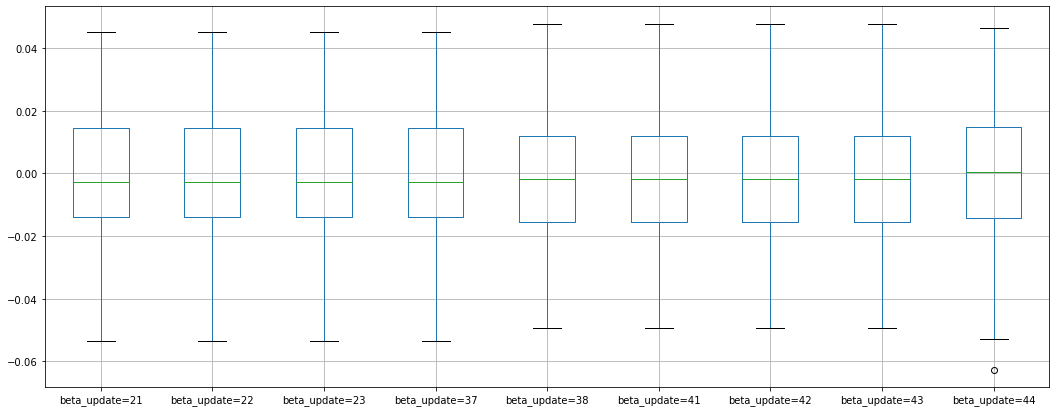

In [17]:
plt.figure(figsize=(18,7))
dfz.boxplot()

<AxesSubplot:xlabel='beta_update', ylabel='step_reward'>

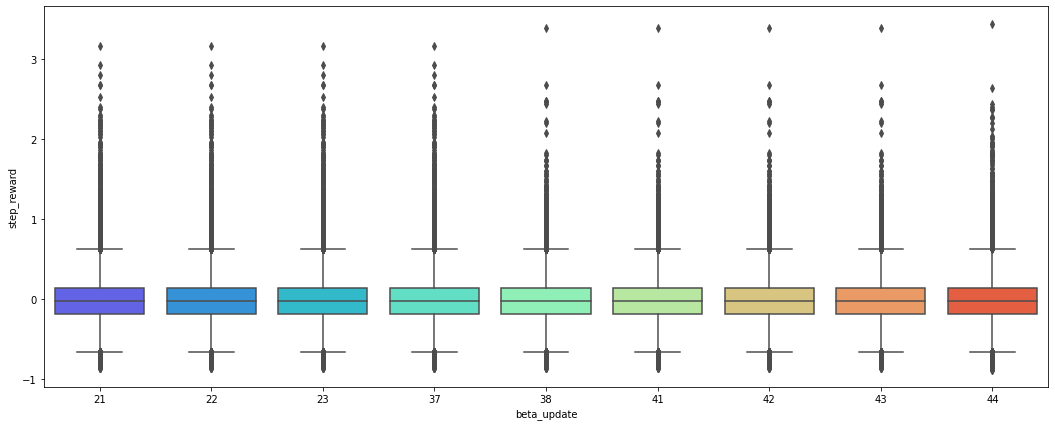

In [18]:
plt.figure(figsize=(18,7))
sns.boxplot(x='beta_update', y='step_reward', data=bigdf, palette='rainbow')

In [35]:
g = sns.FacetGrid(bigdf, row='beta_update') 
g.figure.set_figwidth(10)
#g.map_dataframe(sns.scatterplot, x='step', y='step_reward')
g.map_dataframe(sns.kdeplot, x=bigdf.step, y=bigdf.step_reward, cmap="Reds", shade=True, bw_adjust=.5)

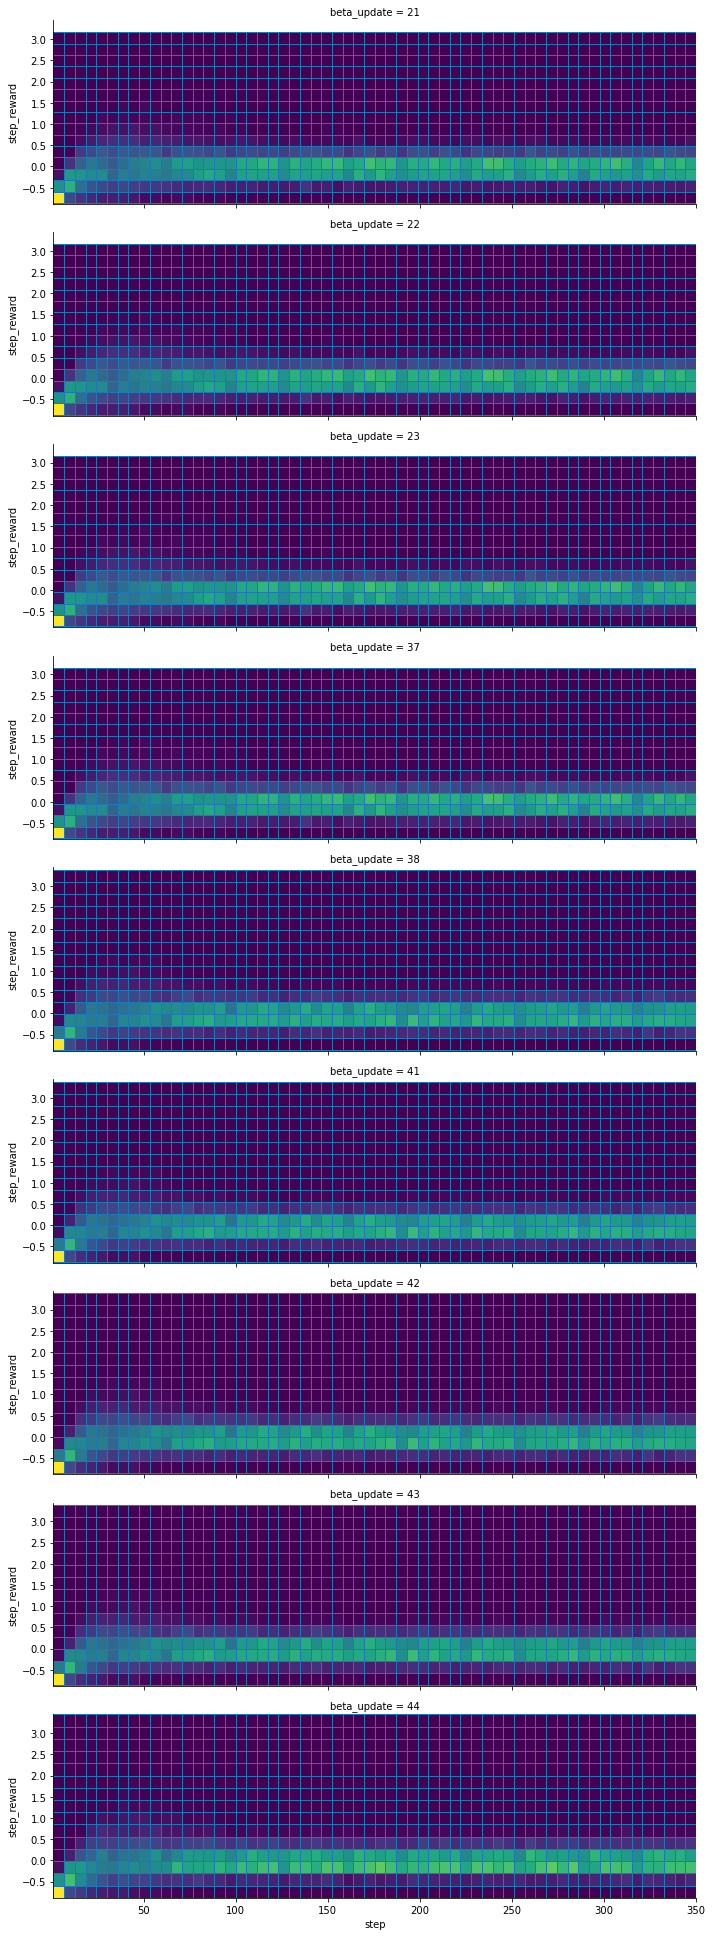

In [34]:
g = sns.FacetGrid(bigdf, row='beta_update') 
g.figure.set_figwidth(10)
#g.map_dataframe(plt.hexbin, x='step', y='step_reward', gridsize=(40,10))
g.map_dataframe(plt.hist2d, x='step', y='step_reward', bins=(60,15))

In [21]:
#demora demais!
#g = sns.FacetGrid(bigdf,row='beta_update') 
#g.figure.set_figwidth(10)
#g.map_dataframe(sns.kdeplot)

<AxesSubplot:xlabel='step_reward', ylabel='Density'>

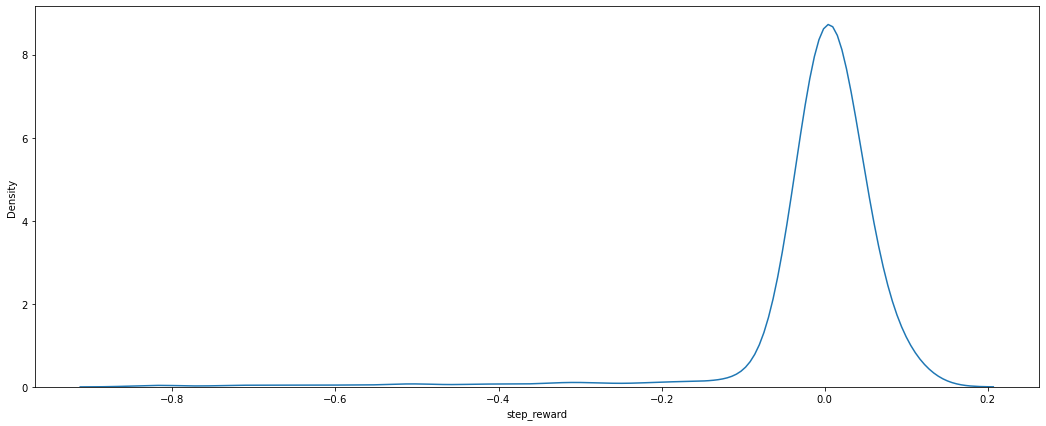

In [22]:
plt.figure(figsize=(18,7))
sns.kdeplot(data=bigdf[filter].groupby('step')['step_reward'].mean())